In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
%matplotlib inline

In [82]:
df1 = pd.read_csv('test.csv') 
df1

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root
5,Test_1_vowel_diacritic,Test_1,vowel_diacritic
6,Test_2_consonant_diacritic,Test_2,consonant_diacritic
7,Test_2_grapheme_root,Test_2,grapheme_root
8,Test_2_vowel_diacritic,Test_2,vowel_diacritic
9,Test_3_consonant_diacritic,Test_3,consonant_diacritic


In [83]:
HEIGHT = 137
WIDTH = 236
SIZE = 128

TRAIN = ['test_image_data_0.parquet',
        'test_image_data_1.parquet',
        'test_image_data_2.parquet',
        'test_image_data_3.parquet',
        'train_image_data_0.parquet',
        'train_image_data_1.parquet',
        'train_image_data_2.parquet',
        'train_image_data_3.parquet']

OUT_TRAIN = 'train.zip'

In [84]:
def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def crop_resize(img0, size=SIZE, pad=16):
    #crop a box around pixels large than the threshold 
    #some images contain line at the sides
    ymin,ymax,xmin,xmax = bbox(img0[5:-5,5:-5] > 80)
    #cropping may cut too much, so we need to add it back
    xmin = xmin - 13 if (xmin > 13) else 0
    ymin = ymin - 10 if (ymin > 10) else 0
    xmax = xmax + 13 if (xmax < WIDTH - 13) else WIDTH
    ymax = ymax + 10 if (ymax < HEIGHT - 10) else HEIGHT
    img = img0[ymin:ymax,xmin:xmax]
    #remove lo intensity pixels as noise
    img[img < 28] = 0
    lx, ly = xmax-xmin,ymax-ymin
    l = max(lx,ly) + pad
    #make sure that the aspect ratio is kept in rescaling
    img = np.pad(img, [((l-ly)//2,), ((l-lx)//2,)], mode='constant')
    return cv2.resize(img,(size,size))

OSError: Passed non-file path: train_image_data_0.parquet

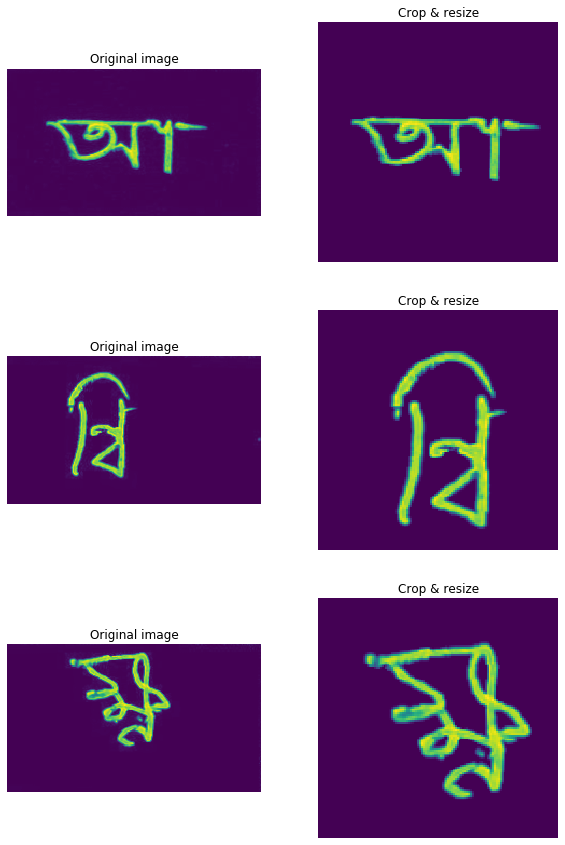

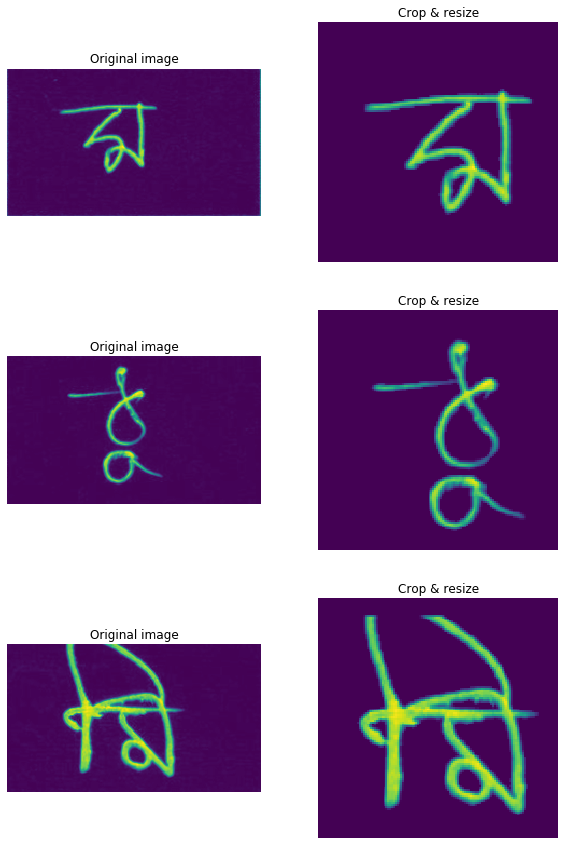

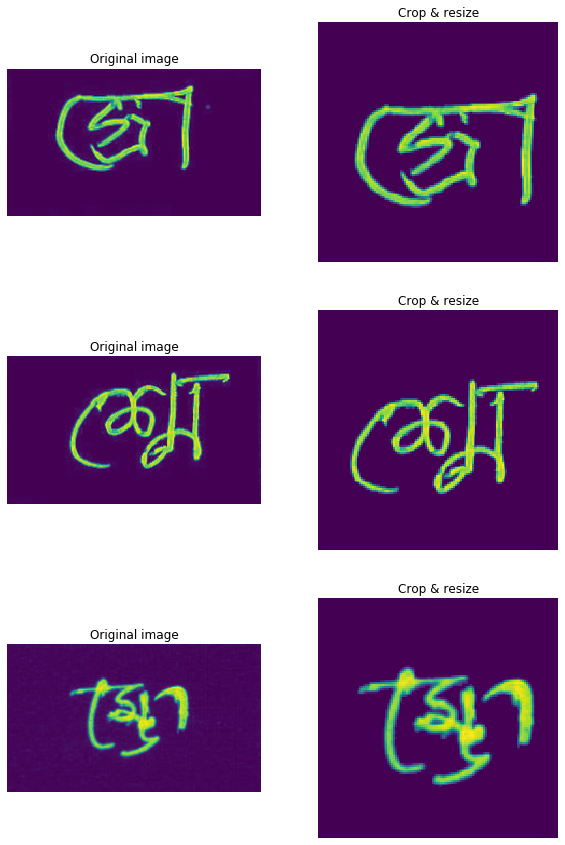

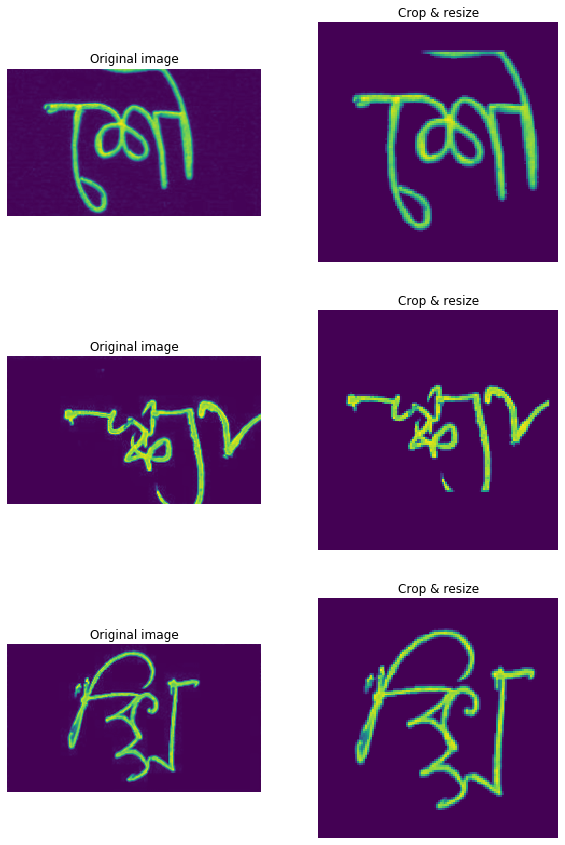

In [85]:
#df = pd.read_parquet(TRAIN[1], engine='pyarrow')

for data in TRAIN:
    df = pd.read_parquet(data, engine='pyarrow')

    n_imgs = 3
    fig, axs = plt.subplots(n_imgs, 2, figsize=(10, 5*n_imgs))

    for idx in range(n_imgs):
        img0 = 255 - df.iloc[idx, 1:].values.reshape(HEIGHT, WIDTH).astype(np.uint8)
        img = (img0*(255.0/img0.max())).astype(np.uint8)
        img = crop_resize(img)

        axs[idx,0].imshow(img0)
        axs[idx,0].set_title('Original image')
        axs[idx,0].axis('off')
        axs[idx,1].imshow(img)
        axs[idx,1].set_title('Crop & resize')
        axs[idx,1].axis('off')
plt.show()

In [86]:
df = pd.read_parquet('train_image_data_3.parquet', engine='pyarrow')
df.head()

OSError: Passed non-file path: train_image_data_3.parquet